# Chiropractic Scheduling and Management System Prototype

## Introduction and Purpose
This notebook demonstrates a prototype for a Chiropractic Scheduling and Management System designed to optimize resource allocation and meet demand at multi-location practices. It integrates key principles of Software Systems (SS) and Data Management (DM) to:
- Improve scheduling efficiency.
- Minimize missed revenue opportunities.
- Enhance patient satisfaction.

The prototype focuses on showcasing functionality, from generating synthetic data to communicating actionable insights. While the data is synthetic, it highlights how predictive analytics can drive decision-making in real-world settings.

The sections that follow illustrate the system's design and capabilities through step-by-step implementation, aligning with the curricular integration of the MSCISBA program.


The next section provides a high-level overview of the system's design, offering a comprehensive view of how all entities interact in a fully realized implementation.


## System Design Context: Big Picture ERD

To provide a comprehensive understanding of the Chiropractic Scheduling and Management System, we begin with the **Big Picture ERD**. This diagram represents the maximum scope of the system, showcasing all potential entities and relationships. It incorporates features like walk-ins, payment tracking, and additional workflows, which are beyond the scope of this specific prototype.

Key entities in the **Big Picture ERD** include:
- **Customer**: Represents patients booking appointments or walk-ins.
- **Chiropractor**: Tracks chiropractors providing services.
- **Appointment**: Links customers, chiropractors, and locations, capturing scheduling and status details.
- **DemandForecast**: Provides data-driven predictions for staffing optimization.
- **Location**: Tracks chiropractic office locations.
- **Payment**: Captures financial transactions for services rendered.

While this ERD provides a detailed system design, the current prototype focuses solely on scheduled appointments and predictive analytics to optimize scheduling and resource utilization.

The **Big Picture ERD** can be viewed below:



In [ ]:
from IPython.display import Image, display

# URL of the image
image_url = "https://github.com/unflinching7/randomfilestorage/raw/main/Project.1.drawio.jpg"

# Display the image in the notebook
display(Image(url=image_url, width=800))  # Adjust width as needed




While the Big Picture ERD offers a detailed blueprint for a full-fledged system, this prototype narrows its focus to demonstrate core functionality. By prioritizing scheduled appointments and predictive analytics, the prototype provides a manageable starting point, allowing for future expansion into areas like payment processing and walk-in handling.


## Project-Specific Focus

With the **Big Picture ERD** setting the stage for a comprehensive system design, the following steps narrow the scope to the prototype-specific implementation. This project focuses exclusively on:
- Optimizing scheduled appointments.
- Capturing patient preferences.
- Predicting demand and reducing missed revenue opportunities.

The next sections will detail the step-by-step implementation of this streamlined prototype.


The streamlined focus ensures the prototype remains both effective and demonstrative of core concepts. With this context, we proceed to implement the prototype, starting with the setup of the development environment.


## Step 1: Setting Up the Environment

### Curricular Connection: Software Systems (SS)
This step establishes the foundation for implementing the prototype by setting up the required software environment. By leveraging Google Colab and Python libraries, we ensure modularity and scalability, key principles of Software Systems (SS).

The libraries used here enable seamless data handling, predictive analytics, and visualization, all essential for the system's functionality. This setup aligns with the project's goal of demonstrating an end-to-end system prototype.

### Libraries to Be Installed
1. pandas: For managing and manipulating structured data.
2. numpy: For numerical calculations and processing.
3. faker: To generate synthetic data (used during the development stage; not required for analysis).
4. matplotlib: To create visualizations illustrating data trends and outcomes.
5. scikit-learn: To apply predictive analytics for demand forecasting and optimization.

### Note:
The synthetic data has already been generated and saved in a CSV file (chiropractic_data_cleaned.csv) as part of the project. This file will be loaded from the GitHub repository in subsequent steps.

#### Important:  
Do NOT regenerate synthetic data during analysis.

The code below installs these libraries and verifies that they are ready for use in the project.





In [ ]:
# Install necessary libraries
!pip install pandas numpy faker matplotlib scikit-learn

# Verify the installations
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print("Libraries installed and imported successfully.")



Libraries installed and imported successfully.


## Step 2: Display the ERD

The following section introduces the streamlined ERD, which focuses exclusively on scheduled appointments, chiropractor availability, and demand forecasting. This targeted approach aligns with the prototype's objective of optimizing resource allocation and improving scheduling efficiency.

### Curricular Connection: Data Management (DM)
The Entity-Relationship Diagram (ERD) defines the system's data flow, focusing on entities such as appointments, locations, and demand forecasts. These entities are central to capturing customer preferences, tracking unmet demand, and supporting decision-making.

By structuring the system's data architecture, we adhere to key principles of Data Management (DM), ensuring that the prototype can store, retrieve, and analyze data effectively.

### Key Entities and Relationships
#### Appointment:
- Captures customer preferences (e.g., preferred time and location) and final booking decisions.
- Provides feedback on unmet demand to improve future scheduling decisions.

#### Location:
- Represents chiropractic offices where appointments are held.

#### DemandForecast:
- Predictive and feedback data to optimize scheduling and resource allocation.

### Relationships
- Appointment to Location: Indicates where the appointment takes place.
- Appointment to DemandForecast: Provides feedback on unmet demand and informs future predictions.
- DemandForecast to Appointment: Forecasting data drives scheduling decisions.

This ERD ensures alignment between the prototype's design and objectives by providing a clear visualization of the system's data flow.







Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


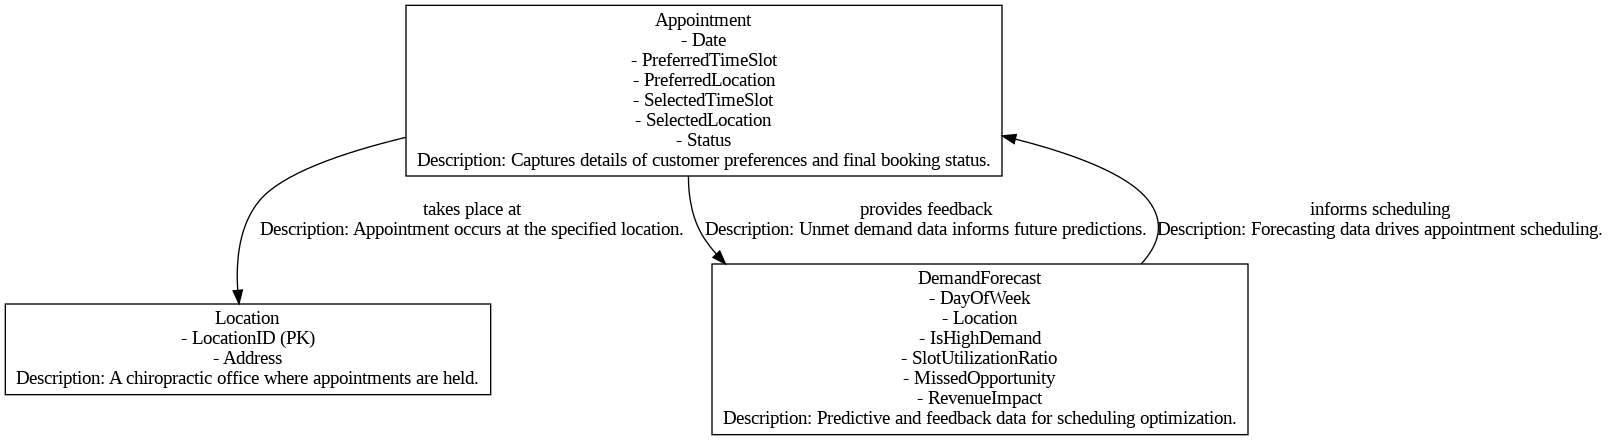

In [ ]:
# Install dependencies
!apt-get install graphviz-dev
!pip install pygraphviz --no-binary pygraphviz

# Import necessary libraries
from pygraphviz import AGraph
from IPython.display import Image, display

# Create a new graph object for the updated ERD
graph = AGraph(strict=False, directed=True)

# Add nodes for core entities with their updated attributes and descriptions
graph.add_node("Appointment", shape="box", label="Appointment\n"
                                                 "- Date\n"
                                                 "- PreferredTimeSlot\n"
                                                 "- PreferredLocation\n"
                                                 "- SelectedTimeSlot\n"
                                                 "- SelectedLocation\n"
                                                 "- Status\n"
                                                 "Description: Captures details of customer preferences and final booking status.")
graph.add_node("Location", shape="box", label="Location\n"
                                              "- LocationID (PK)\n"
                                              "- Address\n"
                                              "Description: A chiropractic office where appointments are held.")
graph.add_node("DemandForecast", shape="box", label="DemandForecast\n"
                                                    "- DayOfWeek\n"
                                                    "- Location\n"
                                                    "- IsHighDemand\n"
                                                    "- SlotUtilizationRatio\n"
                                                    "- MissedOpportunity\n"
                                                    "- RevenueImpact\n"
                                                    "Description: Predictive and feedback data for scheduling optimization.")

# Define relationships (edges) between the entities with updated labels
graph.add_edge("Appointment", "Location", label="takes place at\n"
                                                 "Description: Appointment occurs at the specified location.")
graph.add_edge("Appointment", "DemandForecast", label="provides feedback\n"
                                                      "Description: Unmet demand data informs future predictions.")
graph.add_edge("DemandForecast", "Appointment", label="informs scheduling\n"
                                                      "Description: Forecasting data drives appointment scheduling.")

# Save the updated ERD as an image file
output_file = "Updated_Prototype_ERD.png"
graph.draw(output_file, prog="dot", format="png")  # Use 'dot' layout for better graph rendering

# Display the saved image in Google Colab
display(Image(output_file))  # Displays the image in the Colab notebook




## Step 3: Generate and Save Enhanced Dataset

### Curricular Connection: Business Analytics (BA)
This step simulates real-world data scenarios by creating a dataset with key features such as demand patterns, missed opportunities, and revenue impact. These insights form the basis for analytical models used in subsequent steps.

### Key Features
1. DayOfWeek: Represents the day of the week (e.g., 0 for Monday).
2. PreferredTimeSlot and PreferredLocation: Customer preferences for appointments.
3. IsHighDemand: Indicates whether the requested time slot and location are in high demand.
4. IsPreferredAvailable: Captures whether the customer's preferred time and location were available.
5. SelectedTimeSlot and SelectedLocation: The slot and location chosen by the customer, if available or an alternative was accepted.
6. MissedOpportunity: Tracks whether the system missed a scheduling opportunity.
7. RevenueImpact: Quantifies the potential revenue lost due to missed opportunities.
8. SlotUtilizationRatio: Reflects the ratio of booked slots to total slots for a given time and location.

### Purpose:
The enhanced dataset provides the foundation for the algorithms used to predict slot availability, estimate revenue impact, and classify missed opportunities. It captures critical insights into demand patterns and resource utilization.

The dataset is saved as chiropractic_data_with_features.csv and is used directly in algorithm training and evaluation.







In [ ]:
# Import necessary libraries
import pandas as pd
import random
from faker import Faker

fake = Faker()

# Parameters for synthetic data generation
NUM_WEEKS = 4
NUM_LOCATIONS = 3
TIME_SLOTS = ["9:00 AM", "10:00 AM", "11:00 AM", "1:00 PM", "2:00 PM", "3:00 PM"]
DAYS_OF_WEEK = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# High-demand slots (arbitrary example)
HIGH_DEMAND_SLOTS = {"10:00 AM", "11:00 AM"}
HIGH_DEMAND_LOCATIONS = ["Location 1"]

# Initialize slot availability tracker for utilization ratio
slot_tracker = {f"{day}_{slot}_Location {loc}": {"booked": 0, "total": 50} for day in DAYS_OF_WEEK
                for slot in TIME_SLOTS for loc in range(1, NUM_LOCATIONS + 1)}

# Generate synthetic data
data = []
for week in range(NUM_WEEKS):
    for day_idx, day_name in enumerate(DAYS_OF_WEEK):
        for _ in range(50):  # Simulate 50 user requests per day
            # Customer's preferred time slot and location
            preferred_time_slot = random.choice(TIME_SLOTS)
            preferred_location = f"Location {random.randint(1, NUM_LOCATIONS)}"

            # Check if high-demand
            is_high_demand = int(preferred_time_slot in HIGH_DEMAND_SLOTS and preferred_location in HIGH_DEMAND_LOCATIONS)

            # Simulate availability
            is_preferred_available = random.choice([True, False])

            # Handle availability scenarios
            if is_preferred_available:
                selected_time_slot = preferred_time_slot
                selected_location = preferred_location
                missed_opportunity = 0
                revenue_impact = 0
                # Update slot tracker
                key = f"{day_name}_{preferred_time_slot}_{preferred_location}"
                slot_tracker[key]["booked"] += 1
            else:
                # Suggest alternative options
                alternate_time_slot = random.choice([slot for slot in TIME_SLOTS if slot != preferred_time_slot])
                alternate_location = f"Location {random.randint(1, NUM_LOCATIONS)}"

                # Simulate user decision to select an alternative
                user_accepted_alternative = random.choice([True, False])

                if user_accepted_alternative:
                    selected_time_slot = alternate_time_slot
                    selected_location = alternate_location
                    missed_opportunity = 0
                    revenue_impact = 0
                else:
                    selected_time_slot = None
                    selected_location = None
                    missed_opportunity = 1
                    revenue_impact = 50  # Example revenue impact per missed opportunity

            # Update total slot count
            key = f"{day_name}_{preferred_time_slot}_{preferred_location}"
            slot_tracker[key]["total"] += 1

            # Append to data
            data.append({
                "DayOfWeek": day_idx,  # Numerical representation of the day (0 = Monday, 1 = Tuesday, etc.)
                "PreferredTimeSlot": preferred_time_slot,
                "PreferredLocation": preferred_location,
                "IsHighDemand": is_high_demand,
                "IsPreferredAvailable": int(is_preferred_available),
                "SelectedTimeSlot": selected_time_slot,
                "SelectedLocation": selected_location,
                "MissedOpportunity": missed_opportunity,
                "RevenueImpact": revenue_impact
            })

# Create DataFrame
df = pd.DataFrame(data)

# Add Slot Utilization Ratio
utilization_ratios = []
for index, row in df.iterrows():
    key = f"{DAYS_OF_WEEK[row['DayOfWeek']]}_{row['PreferredTimeSlot']}_{row['PreferredLocation']}"
    ratio = slot_tracker[key]["booked"] / max(1, slot_tracker[key]["total"])
    utilization_ratios.append(ratio)

df["SlotUtilizationRatio"] = utilization_ratios

# Encode categorical fields
df['PreferredTimeSlot'] = df['PreferredTimeSlot'].astype('category').cat.codes
df['PreferredLocation'] = df['PreferredLocation'].astype('category').cat.codes
df['SelectedTimeSlot'] = df['SelectedTimeSlot'].astype('category').cat.codes
df['SelectedLocation'] = df['SelectedLocation'].astype('category').cat.codes

# Save CSV
df.to_csv("chiropractic_data_with_features.csv", index=False)

print("Synthetic data with features saved as chiropractic_data_with_features.csv")
print("\nSample Data:")
print(df.head())







Synthetic data with features saved as chiropractic_data_with_features.csv

Sample Data:
   DayOfWeek  PreferredTimeSlot  PreferredLocation  IsHighDemand  \
0          0                  4                  2             0   
1          0                  3                  1             0   
2          0                  0                  1             0   
3          0                  0                  2             0   
4          0                  4                  1             0   

   IsPreferredAvailable  SelectedTimeSlot  SelectedLocation  \
0                     1                 4                 2   
1                     1                 3                 1   
2                     0                -1                -1   
3                     1                 0                 2   
4                     0                -1                -1   

   MissedOpportunity  RevenueImpact  SlotUtilizationRatio  
0                  0              0              0.070175  
1   

## Step 4: Build and Compare Core Algorithms

### Curricular Connection: Software Systems (SS) and Business Analytics (BA)
This step implements predictive models to analyze the system's scheduling efficiency and identify unmet demand. The use of Random Forest, XGBoost, and Logistic Regression demonstrates how Software Systems (SS) can integrate with Business Analytics (BA) to generate actionable insights.

### Key Objectives
1. Predict Slot Availability: Determine if a customer's preferred time and location are available.
2. Estimate Revenue Impact: Calculate the financial loss due to unmet demand.
3. Classify Missed Opportunities: Identify when a customer's preferences are unmet.

### Selected Algorithms
1. Random Forest: Predicts slot availability based on customer preferences and system utilization trends.
2. XGBoost: Estimates revenue impact and highlights periods of high demand.
3. Logistic Regression: Classifies missed opportunities to inform scheduling adjustments.

### Data Used for Training
The algorithms are trained using key features from the dataset:
- DayOfWeek: Day of the week (e.g., 0 for Monday).
- PreferredTimeSlot and PreferredLocation: Customer preferences.
- IsHighDemand: Indicates high-demand periods.
- SlotUtilizationRatio: Ratio of booked slots to total slots.

These algorithms provide actionable insights to optimize scheduling and resource allocation.









In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # For balancing the dataset

# Load the updated dataset
# data = pd.read_csv("chiropractic_data_with_features.csv") #used in building model


url = "https://raw.githubusercontent.com/unflinching7/randomfilestorage/refs/heads/main/chiropractic_data_with_features.csv"
data = pd.read_csv(url)


# Define feature sets and target variables
# Availability Prediction (Random Forest)
X_availability = data[['DayOfWeek', 'PreferredTimeSlot', 'PreferredLocation', 'IsHighDemand', 'SlotUtilizationRatio']]
y_availability = data['IsPreferredAvailable']

# Revenue Impact Estimation (XGBoost)
X_revenue = data[['DayOfWeek', 'PreferredTimeSlot', 'PreferredLocation', 'IsHighDemand', 'SlotUtilizationRatio']]
y_revenue = data['RevenueImpact']

# Missed Opportunity Classification (Logistic Regression)
X_opportunity = data[['DayOfWeek', 'PreferredTimeSlot', 'PreferredLocation', 'IsHighDemand', 'SlotUtilizationRatio']]
y_opportunity = data['MissedOpportunity']

# Train-test splits
X_train_avail, X_test_avail, y_train_avail, y_test_avail = train_test_split(X_availability, y_availability, test_size=0.2, random_state=42)
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)
X_train_opp, X_test_opp, y_train_opp, y_test_opp = train_test_split(X_opportunity, y_opportunity, test_size=0.2, random_state=42)

# Initialize results dictionary
results = {}

# Random Forest for Slot Availability
rf_avail = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=3)
rf_avail.fit(X_train_avail, y_train_avail)
y_pred_avail_rf = rf_avail.predict(X_test_avail)
results['Random Forest - Availability'] = {
    'Accuracy': accuracy_score(y_test_avail, y_pred_avail_rf),
    'Classification Report': classification_report(y_test_avail, y_pred_avail_rf)
}

# XGBoost for Revenue Impact
xgb_revenue = XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.05, max_depth=5, objective='reg:squarederror')
xgb_revenue.fit(X_train_rev, y_train_rev)
y_pred_rev_xgb = xgb_revenue.predict(X_test_rev)
results['XGBoost - Revenue'] = {
    'MAE': mean_absolute_error(y_test_rev, y_pred_rev_xgb),
    'R2': r2_score(y_test_rev, y_pred_rev_xgb)
}

# Balance the dataset for Missed Opportunity using SMOTE
smote = SMOTE(random_state=42)
X_train_opp_bal, y_train_opp_bal = smote.fit_resample(X_train_opp, y_train_opp)

# Logistic Regression for Missed Opportunity
lr_opp = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_opp.fit(X_train_opp_bal, y_train_opp_bal)
y_pred_opp_lr = lr_opp.predict(X_test_opp)
results['Logistic Regression - Missed Opportunity'] = {
    'Accuracy': accuracy_score(y_test_opp, y_pred_opp_lr),
    'Classification Report': classification_report(y_test_opp, y_pred_opp_lr)
}

# Display results
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        if metric == "Classification Report":
            print(f"\n{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")











Random Forest - Availability:
Accuracy: 0.5536

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       138
           1       0.56      0.55      0.56       142

    accuracy                           0.55       280
   macro avg       0.55      0.55      0.55       280
weighted avg       0.55      0.55      0.55       280


XGBoost - Revenue:
MAE: 18.0397
R2: -0.0816

Logistic Regression - Missed Opportunity:
Accuracy: 0.5929

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       214
           1       0.30      0.53      0.38        66

    accuracy                           0.59       280
   macro avg       0.55      0.57      0.54       280
weighted avg       0.69      0.59      0.62       280



## Illustrating the Prototype: Context and Purpose

### Curricular Connection: Integration Across SS, DM, and BA
This prototype is designed as a proof of concept to demonstrate how a Chiropractic Scheduling and Management System can function in a multi-location setting. While the data used in this project is synthetically generated, the goal is to showcase the system's architecture, algorithms, and predictive capabilities, not to achieve real-world accuracy.

### Key Points:
1. Synthetic Data: The data reflects predefined scenarios and trends but may lack the complexity and variability of real-world data.
2. Prototype Focus:
    - Highlighting how the system captures and analyzes missed opportunities, unmet demand, and revenue impacts.
    - Demonstrating the integration of predictive analytics for decision-making.
3. Interpretation of Metrics: Model scores should be viewed as an indication of system behavior rather than definitive predictions. Refinements for real-world deployment would include using real data and conducting thorough validation.

### Transition:
Next, we visualize insights generated by the models to illustrate the prototype's functionality and decision-making process.



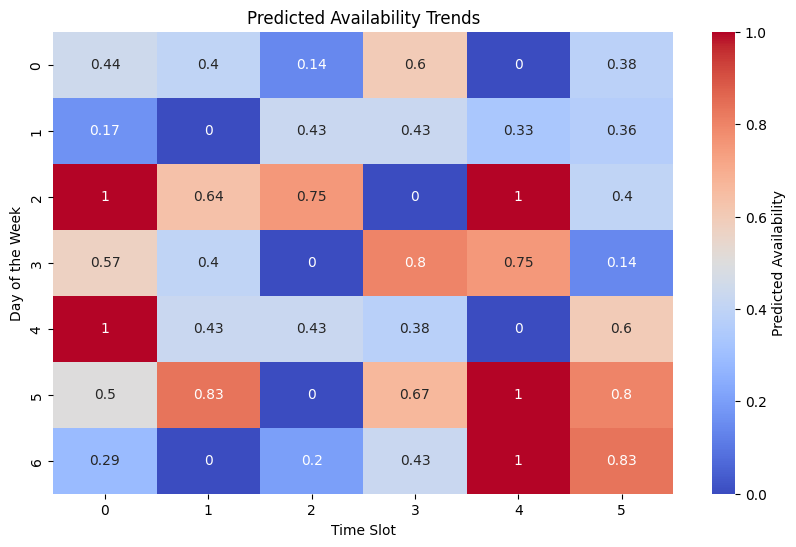

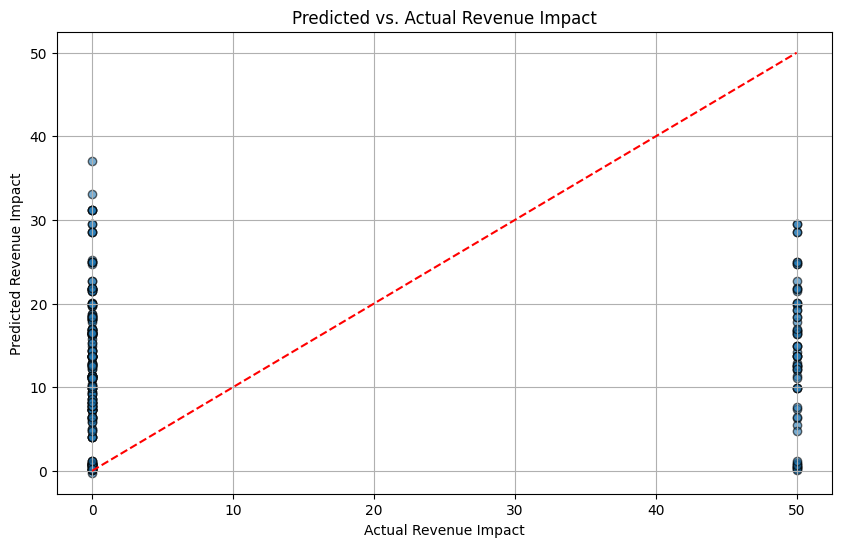

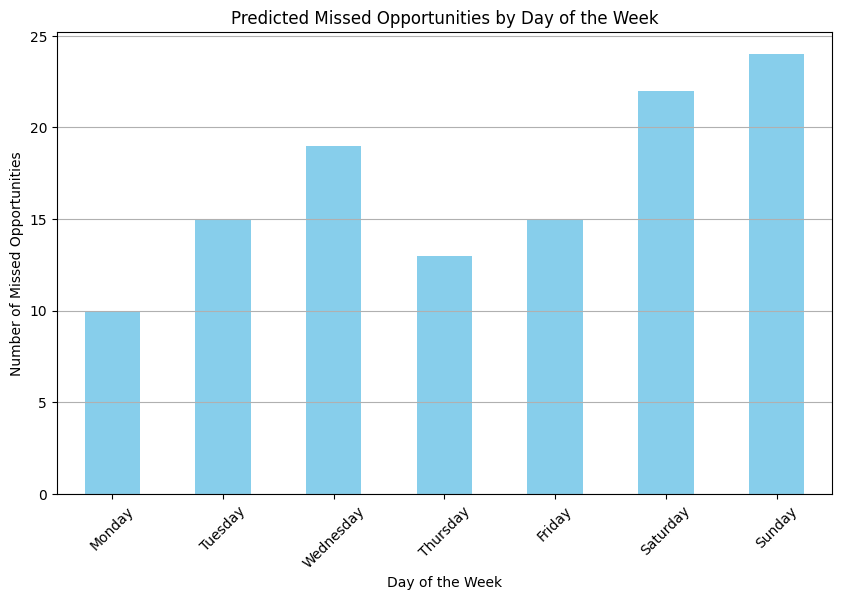

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Availability Trends (Random Forest)
availability_trends = pd.DataFrame({
    "DayOfWeek": X_test_avail['DayOfWeek'],
    "TimeSlot": X_test_avail['PreferredTimeSlot'],
    "PredictedAvailability": y_pred_avail_rf
})

# Heatmap for availability
availability_pivot = availability_trends.pivot_table(
    index='DayOfWeek',
    columns='TimeSlot',
    values='PredictedAvailability',
    aggfunc='mean'
)
plt.figure(figsize=(10, 6))
sns.heatmap(availability_pivot, annot=True, cmap="coolwarm", cbar_kws={'label': 'Predicted Availability'})
plt.title("Predicted Availability Trends")
plt.xlabel("Time Slot")
plt.ylabel("Day of the Week")
plt.show()

# Visualize Revenue Impact (XGBoost)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rev, y_pred_rev_xgb, alpha=0.6, edgecolor='k')
plt.plot([min(y_test_rev), max(y_test_rev)], [min(y_test_rev), max(y_test_rev)], color="red", linestyle="--")
plt.title("Predicted vs. Actual Revenue Impact")
plt.xlabel("Actual Revenue Impact")
plt.ylabel("Predicted Revenue Impact")
plt.grid(True)
plt.show()

# Visualize Missed Opportunity (Logistic Regression)
missed_opportunity_df = pd.DataFrame({
    "DayOfWeek": X_test_opp['DayOfWeek'],
    "MissedOpportunity": y_pred_opp_lr
})
missed_opportunity_summary = missed_opportunity_df.groupby("DayOfWeek")['MissedOpportunity'].sum()

# Bar chart for missed opportunities
plt.figure(figsize=(10, 6))
missed_opportunity_summary.plot(kind='bar', color='skyblue')
plt.title("Predicted Missed Opportunities by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Missed Opportunities")
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.grid(axis='y')
plt.show()


### Model Selection and Transition to System Integration

The visualizations highlight key insights from the models:
1. **Random Forest for Availability Prediction**:
   - Demonstrates consistent and interpretable trends in availability predictions.
   - Selected for its ability to identify high-demand time slots and locations, aiding in scheduling decisions.

2. **XGBoost for Revenue Impact**:
   - While not highly accurate on synthetic data, it provides a framework for modeling revenue implications of unmet demand.
   - Chosen as a baseline to explore revenue impact predictions, with potential for refinement in future iterations.

3. **Logistic Regression for Missed Opportunity**:
   - Highlights missed demand patterns effectively.
   - Requires further balancing of precision and recall but serves as a starting point for classifying missed opportunities.

**Transition to System Integration**:
The next step in the prototype is to simulate how the system would function in a real-world setting. This includes:
- **Automating Processes**: Implementing scripts to periodically analyze data and generate insights.
- **Generating Reports**: Compiling outputs into actionable formats for decision-makers, such as email notifications or summaries.
- **System Simulation**: Creating a workflow that reflects the end-to-end functionality of the prototype system.

This approach bridges the gap between model outputs and practical applications, demonstrating the system's potential to improve decision-making in chiropractic practice management.


In [ ]:
# Save the trained Random Forest model
import joblib
joblib.dump(rf_avail, "random_forest_availability_model.pkl")


['random_forest_availability_model.pkl']

In [ ]:
# Import necessary libraries
import pandas as pd
import joblib  # For saving and loading pre-trained models

# Load the dataset
data = pd.read_csv("chiropractic_data_with_features.csv")

# Load the pre-trained Random Forest model
rf_model = joblib.load("random_forest_availability_model.pkl")  # Replace with the actual path to the saved model

# Predict availability using the pre-trained model
data['PredictedAvailability'] = rf_model.predict(data[['DayOfWeek', 'PreferredTimeSlot', 'PreferredLocation', 'IsHighDemand', 'SlotUtilizationRatio']])

# Generate insights from predictions
def generate_insights_with_predictions(data):
    # Identify high-demand slots (low predicted availability)
    high_demand_slots = data[data['PredictedAvailability'] == 0].groupby(['DayOfWeek', 'PreferredTimeSlot']).size()

    # Calculate total revenue impact
    total_revenue_loss = data['RevenueImpact'].sum()

    # Aggregate missed opportunities by day
    missed_opportunity_by_day = data.groupby('DayOfWeek')['MissedOpportunity'].sum()

    # Return insights
    return high_demand_slots, total_revenue_loss, missed_opportunity_by_day

# Generate insights
high_demand_slots, total_revenue_loss, missed_opportunity_by_day = generate_insights_with_predictions(data)

# Prepare mock report
def generate_report_with_predictions(high_demand_slots, total_revenue_loss, missed_opportunity_by_day):
    report = f"""
    Chiropractic Scheduling and Management System Insights:

    High-Demand Slots (Day of Week, Time Slot):
    {high_demand_slots}

    Total Revenue Impact from Missed Opportunities: ${total_revenue_loss}

    Missed Opportunities by Day of the Week:
    {missed_opportunity_by_day.to_string()}

    Recommendations:
    - Focus chiropractor scheduling on high-demand slots to improve availability.
    - Reevaluate staffing levels during low-availability periods to reduce unmet demand.
    """
    return report

# Generate the report
report = generate_report_with_predictions(high_demand_slots, total_revenue_loss, missed_opportunity_by_day)

# Mock sending an email (printing to console for illustration purposes)
def send_email(report):
    print("Sending email to decision-makers...\n")
    print(report)

# Simulate email sending
send_email(report)


Sending email to decision-makers...


    Chiropractic Scheduling and Management System Insights:

    High-Demand Slots (Day of Week, Time Slot):
    DayOfWeek  PreferredTimeSlot
0          0                    25
           1                    22
           2                    20
           3                    27
           4                    10
           5                    25
1          0                    20
           1                    18
           2                     9
           3                    18
           4                    34
           5                    23
2          0                     7
           1                    12
           2                    11
           3                    24
           5                    26
3          0                    15
           1                    20
           2                    36
           3                    11
           4                    10
           5                    24
4          1   

## Email Generation for Reporting

### Curricular Connection: Software Systems (SS) and Business Analytics (BA)
This step demonstrates how the system communicates insights to decision-makers. The email contains key findings from the Random Forest model for availability predictions, focusing on unmet demand, revenue impact, and scheduling recommendations. This process highlights the system's ability to integrate predictive analytics into actionable insights for management.

### The email includes:
1. High-Demand Slots: Identifying days and time slots with the highest unmet demand.
2. Revenue Impact: Estimating financial losses due to missed opportunities.
3. Recommendations: Suggestions for adjusting scheduling and staffing to meet demand.

The following code generates and simulates sending the email to decision-makers.



In [ ]:
# Prepare demand summary with missed opportunities
demand_summary = (
    data.groupby(["DayOfWeek", "PreferredTimeSlot"])
    .agg({"MissedOpportunity": "sum"})
    .reset_index()
)


In [ ]:
# Sample insights generated from the Random Forest model
high_demand_slots = (
    demand_summary.sort_values(by="MissedOpportunity", ascending=False)
    .head(10)[["DayOfWeek", "PreferredTimeSlot", "MissedOpportunity"]]
    .to_string(index=False)
)
total_revenue_impact = int(data["RevenueImpact"].sum())
missed_opportunities = (
    data.groupby("DayOfWeek")["MissedOpportunity"].sum().to_string()
)

# Create the email content
subject = "Chiropractic Scheduling and Management System Insights"
body = f"""
    Chiropractic Scheduling and Management System Insights:

    High-Demand Slots (Day of Week, Time Slot, Missed Opportunities):
    {high_demand_slots}

    Total Revenue Impact from Missed Opportunities: ${total_revenue_impact}

    Missed Opportunities by Day of the Week:
    {missed_opportunities}

    Recommendations:
    - Focus chiropractor scheduling on high-demand slots to improve availability.
    - Reevaluate staffing levels during low-availability periods to reduce unmet demand.
    - Use data insights to inform future hiring decisions for high-demand locations and slots.
"""

# Set up the email server (example using localhost)
email_sender = "system@example.com"
email_recipient = "decisionmaker@example.com"
msg = MIMEMultipart()
msg["From"] = email_sender
msg["To"] = email_recipient
msg["Subject"] = subject
msg.attach(MIMEText(body, "plain"))

try:
    # Simulate sending the email (no actual sending for the prototype)
    print("Sending email to decision-makers...\n")
    print(body)  # Print the email content as a simulation
except Exception as e:
    print(f"Error: {e}")



Sending email to decision-makers...


    Chiropractic Scheduling and Management System Insights:

    High-Demand Slots (Day of Week, Time Slot, Missed Opportunities):
     DayOfWeek  PreferredTimeSlot  MissedOpportunity
         6                  0                 17
         5                  2                 15
         1                  4                 12
         5                  1                 12
         3                  2                 12
         2                  3                 12
         0                  0                 11
         6                  4                 11
         4                  5                 11
         2                  5                 11

    Total Revenue Impact from Missed Opportunities: $18000

    Missed Opportunities by Day of the Week:
    DayOfWeek
0    52
1    45
2    42
3    51
4    51
5    52
6    67

    Recommendations:
    - Focus chiropractor scheduling on high-demand slots to improve availability.
    - Re

## System Flow Documentation

This step documents the flow of the Chiropractic Scheduling and Management System prototype, illustrating how data, algorithms, and insights are integrated to support decision-making. The following workflow highlights the system's key components and their interactions:

1. **Data Generation**:
   - Synthetic data is created to simulate customer preferences, appointment availability, and demand patterns.

2. **Predictive Analytics**:
   - Algorithms analyze the data to predict availability, estimate revenue impact, and identify missed opportunities.

3. **Insight Generation**:
   - Insights derived from the predictive models, such as high-demand slots and unmet demand patterns, are compiled into actionable reports.

4. **Decision-Making Support**:
   - Recommendations based on the insights are communicated to decision-makers via automated reporting (e.g., emails).

This workflow ensures that the prototype effectively demonstrates the integration of **Software Systems** and **Data Management** to optimize scheduling and enhance decision-making.


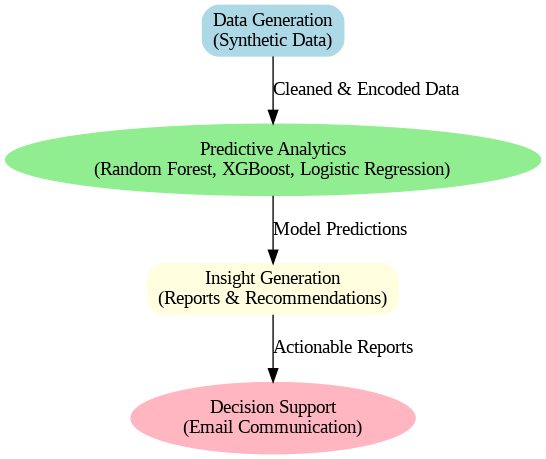

In [ ]:
import graphviz

# Create a directed graph with improved layout
improved_flow = graphviz.Digraph(format="png")
improved_flow.attr(rankdir="TB")  # Top-to-Bottom layout
improved_flow.attr(size="10,5")  # Adjust the size of the diagram

# Define nodes for each major component with better spacing and descriptions
improved_flow.node("Data Generation", "Data Generation\n(Synthetic Data)", shape="box", style="rounded, filled", color="lightblue")
improved_flow.node("Predictive Analytics", "Predictive Analytics\n(Random Forest, XGBoost, Logistic Regression)", shape="ellipse", style="filled", color="lightgreen")
improved_flow.node("Insight Generation", "Insight Generation\n(Reports & Recommendations)", shape="box", style="rounded, filled", color="lightyellow")
improved_flow.node("Decision Support", "Decision Support\n(Email Communication)", shape="ellipse", style="filled", color="lightpink")

# Add edges with descriptive labels
improved_flow.edge("Data Generation", "Predictive Analytics", label="Cleaned & Encoded Data")
improved_flow.edge("Predictive Analytics", "Insight Generation", label="Model Predictions")
improved_flow.edge("Insight Generation", "Decision Support", label="Actionable Reports")

# Render and display the diagram
improved_flow.render("improved_system_flow_diagram", cleanup=True)
from IPython.display import Image
display(Image("improved_system_flow_diagram.png"))



### Transition to Synthesis Paper

The workflow diagram summarizes the prototype’s key components, from data generation to decision-making support. Next, the synthesis paper connects this prototype to the MSCISBA program, highlighting how it integrates Software Systems, Data Management, and Business Analytics to support scheduling decisions and optimize resource allocation.



# Synthesis Paper: Chiropractic Scheduling and Management System Prototype

## Introduction
This synthesis paper bridges the Chiropractic Scheduling and Management System prototype with the MS-CISBA curriculum. Designed for multi-location chiropractic practices, the system addresses critical challenges such as fluctuating demand, inefficient scheduling practices, patient dissatisfaction, and missed revenue opportunities. By integrating Software Systems (SS), Data Management (DM), and Business Analytics (BA), the prototype demonstrates a practical synthesis of foundational concepts. Cybersecurity and Networking (CN), while not implemented, provides a roadmap for future iterations.

Through predictive analytics and actionable insights, the prototype improves scheduling efficiency, aligns staffing levels with demand, and reduces patient frustration caused by unavailable or inconvenient appointment slots.

---

## Core Areas Demonstrated in the Prototype

### Software Systems (SS)
The prototype applies foundational principles of Software Systems (SS) through Python-based algorithms and automated workflows:
- **Algorithms and Automation:** Random Forest models predict slot availability, while workflows generate automated reports summarizing unmet demand and scheduling recommendations.
- **Backend Design:** By focusing on backend functionality, the system avoids unnecessary complexity while ensuring modularity and scalability.

**Portfolio Contributions:**
- This project builds on prior work, such as the **Django Application: Degree Checklist** and the **Ecommerce System for Chiropractic Service Business.** These projects informed the design of modular, data-driven software systems and established best practices in version control.

---

### Data Management (DM)
The project emphasizes robust Data Management (DM) practices through synthetic data pipelines and preprocessing:
- **Synthetic Data Pipeline:** The system generates realistic datasets, encoding fields like demand patterns, revenue impact, and missed opportunities.
- **Scalability:** The pipelines are designed to accommodate larger datasets, simulating real-world conditions effectively.

**Portfolio Contributions:**
- Techniques applied in this prototype draw from the **ETL and Data Pipeline Project** in Google Colab, where end-to-end pipelines were developed for structured and unstructured data.
- The **ERD Diagram for Service and Parts Business** influenced the system’s Entity-Relationship Diagram (ERD), which structures and manages data relationships effectively.

---

### Business Analytics (BA)
The project integrates Business Analytics (BA) by delivering actionable recommendations through predictive models and visualizations:
- **Predictive Insights:** Models generate insights into slot availability and missed opportunities, while exploratory analysis highlights revenue impact.
- **Visualizations:** Heatmaps, scatterplots, and bar charts communicate trends, supporting staffing and scheduling adjustments.

**Addressing Patient Satisfaction and Revenue Loss:**
The system improves patient satisfaction by:
- Capturing preferences to align appointment offerings with patient needs.
- Minimizing frustration from unavailable or inconvenient slots.

The system reduces revenue loss by:
- Maximizing resource utilization during peak demand periods.
- Informing hiring decisions based on identified high-demand trends.

**Portfolio Contributions:**
- Visualization techniques and predictive modeling applied here were honed through the **Credit Risk Prediction Project** and **Tableau Dashboards,** providing a foundation for generating actionable insights.

---

### Cybersecurity and Networking (CN)
Although not implemented in this iteration, Cybersecurity and Networking (CN) will play a critical role in future iterations by ensuring secure data handling and communication:
- **Data Encryption:** Future iterations will encrypt email reports to safeguard sensitive data.
- **Secure Email Protocols:** Implementing SMTP with SSL/TLS will protect insights during transmission.
- **Authentication:** Role-based access controls will ensure only authorized personnel can view sensitive data.

**Portfolio Contributions:**
- The **Credit Card Fraud Detection Project** and **Network Vulnerability Analysis** provided foundational knowledge for identifying and mitigating security risks, which will inform future system enhancements.

---

## Portfolio Contributions
This prototype reflects skills and knowledge gained from prior projects:
- **Data Analytics:** Predictive modeling and visualizations build on skills developed in the **Credit Risk Prediction Project** and **Tableau Dashboards.**
- **Data Management:** Structured pipelines and cleaning techniques draw from the **ETL and Data Pipeline Project** and **ERD Design.**
- **Software Systems:** Modular design principles and Python implementation are influenced by the **Django Application** and **Ecommerce System for Chiropractic Services.**
- **Cybersecurity:** Future encryption and security features align with concepts from the **Credit Card Fraud Detection** and **Network Vulnerability Analysis** projects.

---

## Integration of Curriculum Areas
The prototype effectively synthesizes SS, DM, and BA into a cohesive system:
1. **SS and DM Integration:** Clean, structured data pipelines support machine learning algorithms for efficient processing.
2. **SS and BA Integration:** Predictive models generate actionable insights, automated into email reports for decision-makers.
3. **DM and BA Integration:** Data trends uncovered during preprocessing feed into visualizations, highlighting inefficiencies and informing resource adjustments.

---

## Feasibility and Future Enhancements
This prototype balances simplicity for demonstration with modularity for future expansion:
- **Current Feasibility:** The system demonstrates core functionality, addressing scheduling challenges in multi-location chiropractic practices.
- **Future Enhancements:**
  - **Real-World Data Integration:** Validate and refine predictive models with actual operational data.
  - **Encryption and Security:** Secure email delivery and authentication for sensitive insights.
  - **Real-Time Updates:** Extend functionality for dynamic scheduling and a user-friendly interface.

By addressing these areas, the prototype will evolve into a scalable, secure, and real-time decision-support system.

---

## Conclusion
The Chiropractic Scheduling and Management System prototype integrates SS, DM, and BA to optimize scheduling and resource allocation for chiropractic practices. By addressing patient dissatisfaction and revenue loss, the system enhances operational efficiency and supports informed decision-making. Future iterations will incorporate CN and real-world data, further improving its scalability and relevance in addressing operational inefficiencies.




# README.md Content
# Chiropractic Scheduling and Management System Prototype

## Project Overview
This prototype demonstrates a proof of concept for a Chiropractic Scheduling and Management System designed to optimize appointment scheduling and support decision-making for multi-location chiropractic practices. By integrating predictive analytics, data management, and actionable reporting, it enhances resource utilization, minimizes missed revenue opportunities, and improves patient satisfaction.

### Key Objectives
- **Optimize Scheduling:** Predict high-demand time slots and locations using machine learning.
- **Minimize Revenue Loss:** Identify missed opportunities and their financial impact.
- **Provide Actionable Insights:** Deliver recommendations for staffing and scheduling adjustments.
- **Demonstrate Prototype Workflow:** Use synthetic data to showcase system functionality.

---

## Project Features
- **Synthetic Data Generation:**
  - Simulates customer preferences, chiropractor availability, and appointment outcomes.
  - Data is structured, cleaned, and encoded for use in predictive models.
  
- **Predictive Analytics:**
  - Random Forest predicts slot availability.
  - Revenue impact and missed opportunities addressed through exploratory data analysis and automated reporting.

- **Insight Generation:**
  - Visualizes availability trends, revenue impacts, and missed opportunities.
  - Generates automated reports for decision-makers.

- **Decision Support:**
  - Simulates email communication to deliver actionable recommendations.

---

## Curriculum Integration
This project synthesizes foundational topics from the MS-CISBA program:

### 1. **Software Systems (SS):**
- Predictive algorithms implemented in Python.
- Automated workflows for data analysis and reporting.

### 2. **Data Management (DM):**
- Synthetic data created, stored, and processed using structured pipelines.
- Data cleaning, encoding, and preprocessing to enable machine learning.

### 3. **Business Analytics (BA):**
- Predictive insights for scheduling optimization and revenue impact analysis.
- Visualizations to highlight inefficiencies and support decision-making.

### 4. **Cybersecurity & Networking (CN) (Future Consideration):**
- Potential for secure email communication via encryption.
- Focus on data integrity and secure transfer of insights.

---

## Repository Structure
The repository is organized as follows:

### 1. Primary Files
- README.md: Overview of the project and repository contents.
- colab_notebook.ipynb: Google Colab notebook containing the complete prototype.
- synthesis_paper.md: Included in the Colab notebook, explaining curriculum integration and project relevance.

### 2. Data
- chiropractic_data_with_features.csv: Enhanced synthetic data used in the prototype.

### 3. Models
- random_forest_model.pkl: Pre-trained Random Forest model for availability prediction.

### 4. Visualizations
- availability_trends_heatmap.png: Heatmap of predicted availability trends.
- revenue_impact_scatter.png: Scatterplot of predicted vs. actual revenue impact.
- missed_opportunities_bar.png: Bar chart summarizing missed opportunities by day of the week.

### 5. Presentations
- slides.pdf: Final presentation slides summarizing the project.
- demo_video.mp4: Video demonstration of the system workflow and outputs.

---

## Results and Visualizations
### 1. Predicted Availability Trends
- Identifies high-demand slots and locations, aiding scheduling decisions.

### 2. Revenue Impact Analysis
- Highlights potential financial losses from missed opportunities.

### 3. Missed Opportunities Overview
- Summarizes unmet demand by day of the week to inform resource allocation.

---

## Additional Resources
- Synthesis Paper: Included in the Colab notebook, explaining curriculum integration and project relevance.
- Video Presentation: Demonstrates the system's workflow and functionality.
- Slides: Summarizes the project for presentation purposes.

---

## Future Enhancements
- Incorporate real-world data to validate and refine predictive models.
- Implement encryption for secure email communication.
- Extend the system to include real-time updates and a user interface for broader usability.





## Results and Visualizations
- **Predicted Availability Trends**: Identifies high-demand slots and locations.
- **Revenue Impact Analysis**: Highlights potential financial losses from missed opportunities.
- **Missed Opportunities Overview**: Summarizes unmet demand by day of the week.

---

## Additional Resources
1. **Synthesis Paper**: Explains curriculum integration and project relevance.
2. **Video Presentation**: Demonstrates the system's workflow and functionality.
3. **Slides**: Summarizes the project for presentation purposes.

---

## Future Enhancements
- Add **real-world data** to validate and refine the models.
- Implement **encryption** for secure communication.
- Extend system functionality to include real-time updates and user interfaces.
